In [24]:
'''Perform exploratory data analysis (EDA) to gain insights into the dataset. 
Provide visualizations and summary statistics of the variables. 
Pre process the data to apply the MLR.'''

'Perform exploratory data analysis (EDA) to gain insights into the dataset. \nProvide visualizations and summary statistics of the variables. \nPre process the data to apply the MLR.'

In [49]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load the dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

# Display first few rows
print(" First five records:")
display(df.head())

# General information about the dataset
print("\n Dataset Information:")
df.info()

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 First five records:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170



 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB

 Missing Values:
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [50]:
# Summary statistics for numeric variables
print("\n Summary Statistics:")
display(df.describe())

# Check data types
print("\n Data Types:")
print(df.dtypes)


 Summary Statistics:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000



 Data Types:
Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


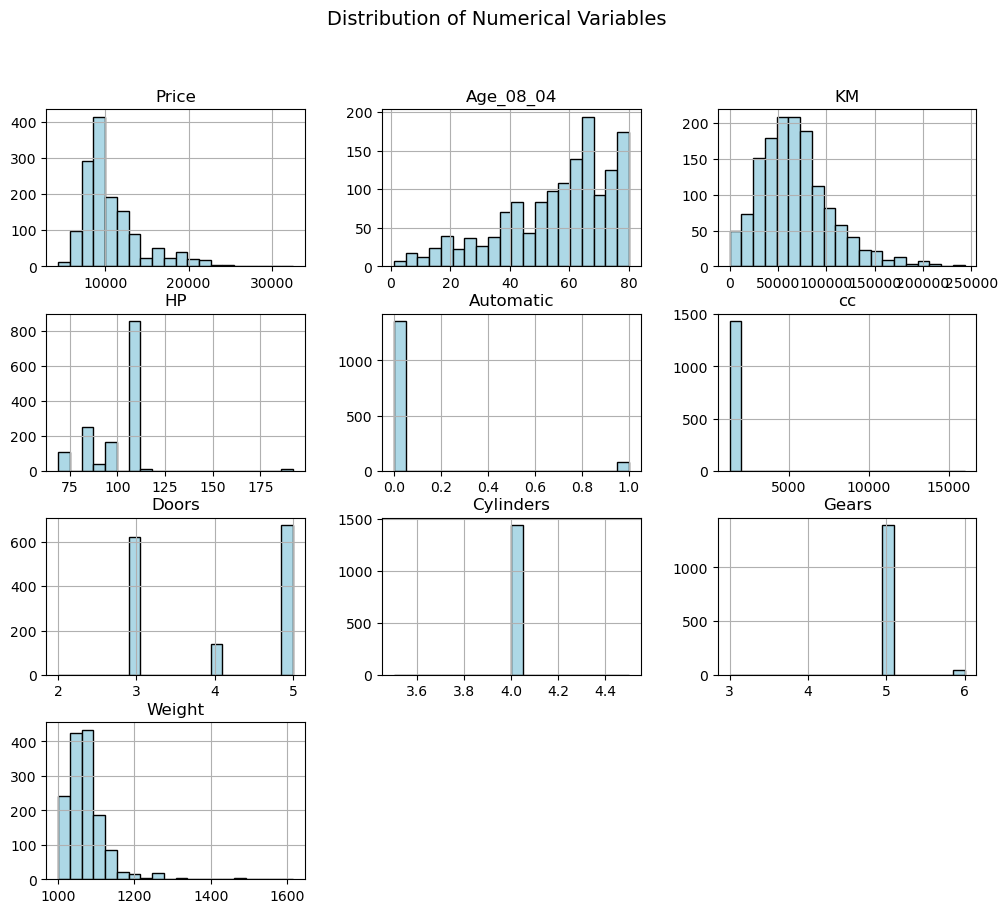

In [51]:
# Visualize the distribution of all numeric columns
df.hist(bins=20, figsize=(12,10), color='lightblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.show()

In [52]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


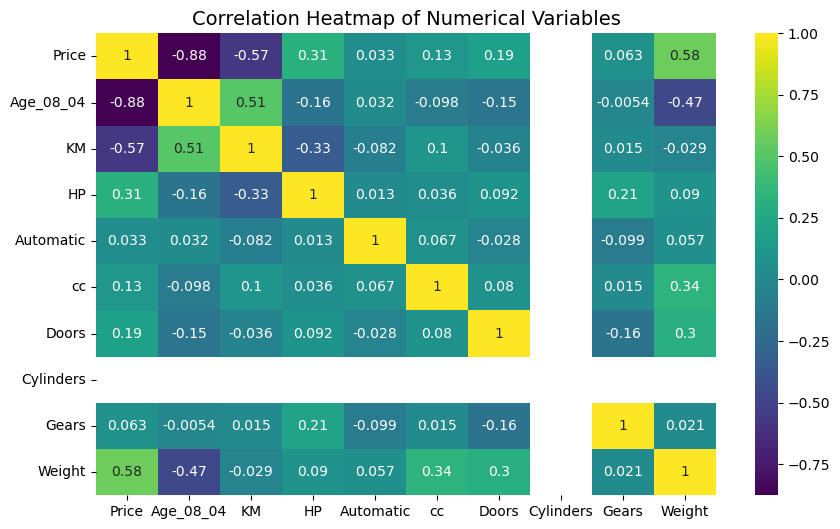

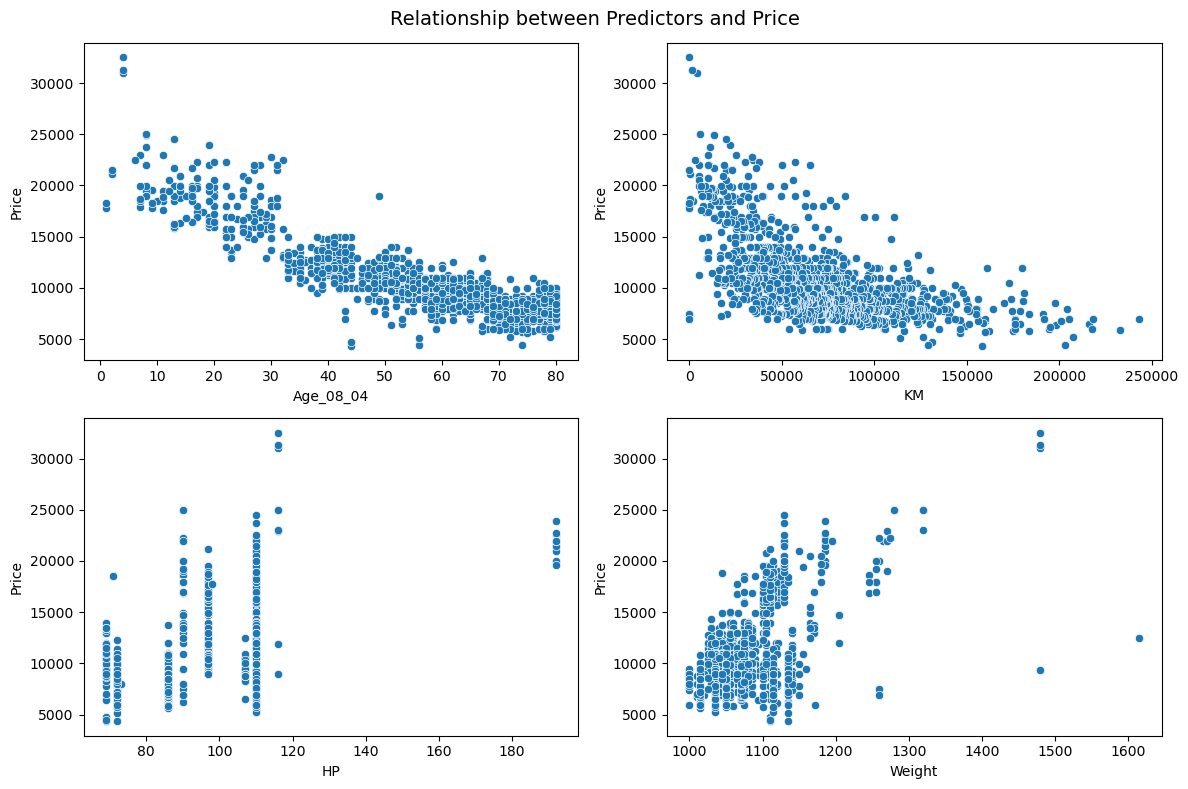

In [53]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()

# Scatter plots for key predictors vs Price
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.scatterplot(x='Age_08_04', y='Price', data=df, ax=axes[0,0])
sns.scatterplot(x='KM', y='Price', data=df, ax=axes[0,1])
sns.scatterplot(x='HP', y='Price', data=df, ax=axes[1,0])
sns.scatterplot(x='Weight', y='Price', data=df, ax=axes[1,1])
fig.suptitle("Relationship between Predictors and Price", fontsize=14)
plt.tight_layout()
plt.show()

In [60]:
'''Price tends to decrease with Age and KM (negative correlation).
Weight and HP appear positively correlated with Price.
Correlation heatmap helps identify multicollinearity before regression.'''

'Price tends to decrease with Age and KM (negative correlation).\nWeight and HP appear positively correlated with Price.\nCorrelation heatmap helps identify multicollinearity before regression.'

In [61]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n✅ After Encoding:")
display(df_encoded.head())


Categorical Columns: ['Fuel_Type']

✅ After Encoding:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


In [62]:
#Handle Missing and Outlier Values
# Drop rows with missing Price values 
df_encoded = df_encoded.dropna(subset=['Price'])

# Treat outliers using Interquartile Range (IQR) method
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_encoded[col] = np.where(df_encoded[col] < lower_limit, lower_limit,
                               np.where(df_encoded[col] > upper_limit, upper_limit, df_encoded[col]))

print("Outliers treated successfully!")


Outliers treated successfully!


In [63]:
print(" Cleaned and Preprocessed Data:")
display(df_encoded.head())

print("\nShape of Final Dataset:", df_encoded.shape)

print("\nCorrelation with Target (Price):")
display(df_encoded.corr()['Price'].sort_values(ascending=False))


 Cleaned and Preprocessed Data:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False



Shape of Final Dataset: (1436, 12)

Correlation with Target (Price):


Price               1.000000
Weight              0.509536
HP                  0.255640
Doors               0.184211
cc                  0.132106
Fuel_Type_Petrol    0.010402
Fuel_Type_Diesel    0.002931
KM                 -0.608832
Age_08_04          -0.895728
Automatic                NaN
Cylinders                NaN
Gears                    NaN
Name: Price, dtype: float64

In [64]:
'''Summary of EDA Findings
Price decreases with Age and KM, meaning older and heavily driven cars are cheaper.
Horsepower (HP) and Weight positively influence price — more powerful, heavier cars tend to cost more.
Fuel Type and Automatic Transmission also affect price.
Dataset cleaned, encoded, and outliers treated — ready for Multiple Linear Regression.'''

'Summary of EDA Findings\nPrice decreases with Age and KM, meaning older and heavily driven cars are cheaper.\nHorsepower (HP) and Weight positively influence price — more powerful, heavier cars tend to cost more.\nFuel Type and Automatic Transmission also affect price.\nDataset cleaned, encoded, and outliers treated — ready for Multiple Linear Regression.'

In [65]:
# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fill any missing values if present
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Step 2: Build and compare three regression models


# MODEL 1: Basic predictors (Age, KM, HP)
model1 = LinearRegression()
model1.fit(X_train[['Age_08_04', 'KM', 'HP']], y_train)
y_pred1 = model1.predict(X_test[['Age_08_04', 'KM', 'HP']])

# MODEL 2: Add more numeric variables (Doors, Gears)
model2 = LinearRegression()
model2.fit(X_train[['Age_08_04', 'KM', 'HP', 'Doors', 'Gears']], y_train)
y_pred2 = model2.predict(X_test[['Age_08_04', 'KM', 'HP', 'Doors', 'Gears']])

# MODEL 3: Include categorical variable (Fuel_Type)
model3 = LinearRegression()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)


# Step 3: Evaluate and compare model performance

print("Model Evaluation Results:\n")
for i, (pred, model) in enumerate(
    [(y_pred1, model1), (y_pred2, model2), (y_pred3, model3)], 1
):
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    print(f"Model {i}: R² = {r2:.3f}, MSE = {mse:.2f}")


# Step 4: Interpret coefficients of the best model

coefficients = pd.DataFrame(model3.coef_, X_train.columns, columns=['Coefficient'])
print("\nCoefficients of the Final Model:\n")
print(coefficients)

# Example Interpretation:
# A negative coefficient (e.g., Age_08_04) means that as the car’s age increases,
# its price decreases, holding other features constant.
# A positive coefficient (e.g., HP or Fuel_Type_Petrol) indicates that
# higher horsepower or being a petrol car increases the car’s price.

# ------------------------------------------------------------
# Step 5: Summary
# ------------------------------------------------------------
# Model 1 uses basic numeric predictors.
# Model 2 adds more car features.
# Model 3 includes categorical variables (Fuel Type) and performs best overall.
# Based on R² and MSE, the model with the highest R² and lowest MSE
# is considered the best model for predicting car price.

Model Evaluation Results:

Model 1: R² = 0.810, MSE = 2530780.78
Model 2: R² = 0.815, MSE = 2472225.92
Model 3: R² = 0.835, MSE = 2203043.82

Coefficients of the Final Model:

                   Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
Automatic         1.488309e+02
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders        -8.242296e-13
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_Diesel -6.854876e+01
Fuel_Type_Petrol  1.370809e+03


In [66]:
#4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

# Predictions from your final model
y_pred = model3.predict(X_test)

# Compute metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Model Evaluation on Testing Data:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Model Evaluation on Testing Data:
R² Score: 0.835
Mean Squared Error (MSE): 2203043.82
Root Mean Squared Error (RMSE): 1484.27
Mean Absolute Error (MAE): 990.89


In [67]:
# LASSO REGRESSION

lasso = Lasso(alpha=0.1)  # alpha is regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression:")
print(f"R² Score: {r2_lasso:.3f}, RMSE: {rmse_lasso:.2f}")



Lasso Regression:
R² Score: 0.835, RMSE: 1484.00


In [68]:
# RIDGE REGRESSION
# -----------------------------
ridge = Ridge(alpha=1.0)  # alpha is regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("\nRidge Regression:")
print(f"R² Score: {r2_ridge:.3f}, RMSE: {rmse_ridge:.2f}")


Ridge Regression:
R² Score: 0.835, RMSE: 1483.15


In [69]:
'''Regularization Techniques:
We applied Lasso and Ridge regression to improve model generalization and handle potential multicollinearity.
Lasso regression can perform feature selection by shrinking some coefficients to zero.
Ridge regression reduces coefficient magnitude without eliminating variables.
Both methods were evaluated on the testing dataset using R² and RMSE.
Comparing the coefficients of Lasso and Ridge models provides insight into the most influential features 
in predicting Toyota
Corolla prices.'''

'Regularization Techniques:\nWe applied Lasso and Ridge regression to improve model generalization and handle potential multicollinearity.\nLasso regression can perform feature selection by shrinking some coefficients to zero.\nRidge regression reduces coefficient magnitude without eliminating variables.\nBoth methods were evaluated on the testing dataset using R² and RMSE.\nComparing the coefficients of Lasso and Ridge models provides insight into the most influential features \nin predicting Toyota\nCorolla prices.'

In [ ]:
Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
Sol:Normalization and standardization are techniques used to scale numerical data so that features contribute equally to a machine learning model. Normalization rescales values to a fixed range, usually between 0 and 1, using the formula(x-x(min))/(x(max)-x(min))
   It is especially useful in distance-based algorithms like K-Means, KNN, or Neural Networks, where large values could otherwise dominate smaller ones. Standardization, on the other hand, transforms data to have a mean of 0 and a standard deviation of 1 using the formula 
(𝑥−𝜇)/𝜎. This is often applied when algorithms assume data follows a normal distribution, such as Linear Regression, SVM, or PCA. Both methods are helpful because they ensure fair comparison among features, improve model performance, speed up convergence, and prevent features with larger scales from overpowering those with smaller scales.


2.What techniques can be used to address multicollinearity in multiple linear regression?
SOl:  ChatGPT said:

Multicollinearity occurs in multiple linear regression when two or more independent variables are highly correlated,
making it difficult for the model to determine the individual effect of each predictor. To address this issue, 
                   several techniques can be applied. One common approach is to remove one of the correlated 
variables, especially if they convey similar information. Another method is to combine correlated features into 
a single variable through techniques like Principal Component Analysis (PCA), which reduces dimensionality while 
retaining most of the information. Regularization methods, such as Ridge Regression (L2) and Lasso Regression (L1), 
can also be used to penalize large coefficients and reduce the impact of multicollinearity. Additionally, examining 
the Variance Inflation Factor (VIF) helps identify problematic variables, which can then be removed or adjusted.
By applying these methods, the model becomes more stable, interpretable, and capable of making reliable predictions.